# README
- This file is used to build up an ID system for add GS and CS

In [3]:
import pandas as pd

In [4]:
base_dir = "C:/Users/31155/Dropbox/EV-GasDualNetwork/Data/intermediate/yiwei/intermidiate"
CS_data_dir = base_dir + "/CS_cleaned/"
GS_data_dir = base_dir + "/GS_cleaned/"

CS_data_set = {}
GS_data_set = {}
for i in range(2013,2026):
    GS_data_set[i] = pd.read_parquet(GS_data_dir + f"{i}.parquet")
    print(f"GS data for year {i} loaded.Length: {len(GS_data_set[i])}")
print()
for i in range(2015,2026):
    CS_data_set[i] = pd.read_parquet(CS_data_dir + f"{i}.parquet")
    print(f"CS data for year {i} loaded.Length: {len(CS_data_set[i])}")

GS data for year 2013 loaded.Length: 101591
GS data for year 2014 loaded.Length: 104327
GS data for year 2015 loaded.Length: 118011
GS data for year 2016 loaded.Length: 119393
GS data for year 2017 loaded.Length: 118441
GS data for year 2018 loaded.Length: 107083
GS data for year 2019 loaded.Length: 113338
GS data for year 2020 loaded.Length: 119894
GS data for year 2021 loaded.Length: 121589
GS data for year 2022 loaded.Length: 110988
GS data for year 2023 loaded.Length: 118521
GS data for year 2024 loaded.Length: 118537
GS data for year 2025 loaded.Length: 107468

CS data for year 2015 loaded.Length: 1856
CS data for year 2016 loaded.Length: 1909
CS data for year 2017 loaded.Length: 4252
CS data for year 2018 loaded.Length: 33552
CS data for year 2019 loaded.Length: 56661
CS data for year 2020 loaded.Length: 72863
CS data for year 2021 loaded.Length: 93389
CS data for year 2022 loaded.Length: 97896
CS data for year 2023 loaded.Length: 119790
CS data for year 2024 loaded.Length: 18476

## Try to use [pname, cityname, adname, address, name...] to match
- These several cells can show why we can not use this method

In [5]:
match_columns = ['pname','cityname','adname','address','name',"大类","中类","小类"]

print("==============GS==============")
for key in GS_data_set.keys():
    data_tmp = GS_data_set[key]
    duplicated_rows = data_tmp[data_tmp.duplicated(subset=match_columns, keep=False)]
    duplicate_count = len(duplicated_rows)
    unique_duplicate_groups = data_tmp.duplicated(subset=match_columns, keep='first').sum()
    
    print(f"Year {key}: Total rows: {len(data_tmp)}, Duplicate percentage: {duplicate_count/len(data_tmp)*100:.2f}%")

print("==============CS==============")
for key in CS_data_set.keys():
    data_tmp = CS_data_set[key]
    duplicated_rows = data_tmp[data_tmp.duplicated(subset=match_columns, keep=False)]
    duplicate_count = len(duplicated_rows)
    unique_duplicate_groups = data_tmp.duplicated(subset=match_columns, keep='first').sum()
    
    print(f"Year {key}: Total rows: {len(data_tmp)}, Duplicate percentage: {duplicate_count/len(data_tmp)*100:.2f}%")

==============GS==============
Year 2013: Total rows: 101591, Duplicate percentage: 28.77%
Year 2014: Total rows: 104327, Duplicate percentage: 8.88%
Year 2015: Total rows: 118011, Duplicate percentage: 2.22%
Year 2016: Total rows: 119393, Duplicate percentage: 2.77%
Year 2017: Total rows: 118441, Duplicate percentage: 0.98%
Year 2018: Total rows: 107083, Duplicate percentage: 1.38%
Year 2019: Total rows: 113338, Duplicate percentage: 1.25%
Year 2020: Total rows: 119894, Duplicate percentage: 0.92%
Year 2021: Total rows: 121589, Duplicate percentage: 0.40%
Year 2022: Total rows: 110988, Duplicate percentage: 0.24%
Year 2023: Total rows: 118521, Duplicate percentage: 0.27%
Year 2024: Total rows: 118537, Duplicate percentage: 0.25%
Year 2025: Total rows: 107468, Duplicate percentage: 0.74%
==============CS==============
Year 2015: Total rows: 1856, Duplicate percentage: 3.23%
Year 2016: Total rows: 1909, Duplicate percentage: 4.30%
Year 2017: Total rows: 4252, Duplicate percentage: 1.72%

In [6]:
duplicate_dataframe = GS_data_set[2013]
duplicate_dataframe = duplicate_dataframe[duplicate_dataframe.duplicated(subset=match_columns, keep=False)]
duplicate_dataframe

,name,address,wgs84_x,wgs84_y,tel,pname,cityname,adname,大类,中类,小类,pname_EN,cityname_EN
79,（练塘服务区）加油站,,121.079884,30.965572,,上海市,上海市,青浦区,汽车服务,加油站,中国石化,Shanghai,Shanghai
80,（练塘服务区）加油站,,121.078464,30.965025,,上海市,上海市,青浦区,汽车服务,加油站,中国石化,Shanghai,Shanghai
118,加油站,杨行镇,121.394010,31.395888,,上海市,上海市,宝山区,汽车服务,加油站,中国石化,Shanghai,Shanghai
119,加油站,,121.395430,31.395360,,上海市,上海市,宝山区,汽车服务,加油站,中国石化,Shanghai,Shanghai
125,加油站,杨行镇,121.423444,31.382130,,上海市,上海市,宝山区,汽车服务,加油站,中国石化,Shanghai,Shanghai
...,...,...,...,...,...,...,...,...,...,...,...,...,...
101529,加油站,,127.850446,45.217852,,黑龙江省,哈尔滨市,尚志市,汽车服务,加油站,中国石油,Heilongjiang Province,Harbin City
101531,加油站,,127.948954,45.189735,,黑龙江省,哈尔滨市,尚志市,汽车服务,加油站,中国石油,Heilongjiang Province,Harbin City
101535,加油站,,128.500584,45.080459,,黑龙江省,哈尔滨市,尚志市,汽车服务,加油站,加油站,Heilongjiang Province,Harbin City
101538,加油站,,128.611447,44.945915,,黑龙江省,哈尔滨市,尚志市,汽车服务,加油站,加油站,Heilongjiang Province,Harbin City


In [115]:
match_columns = ['pname','cityname','adname','address','name',"大类","中类","小类"]

def analyze_data_matching_compact(data_set, dataset_name):
    """
    Analyze data matching between consecutive years with compact output
    """
    print(f"============== {dataset_name} Analysis ==============")
    print("Year | Original | Unique | Duplicates | Matched | New | Match%")
    print("-" * 65)
    
    for year in sorted(data_set.keys()):
        data_current = data_set[year]
        original_count = len(data_current)
        
        # Remove internal duplicates (without modifying original data)
        data_deduplicated = data_current.drop_duplicates(subset=match_columns, keep='first')
        unique_count = len(data_deduplicated)
        duplicates_removed = original_count - unique_count
        
        # Check matching with previous year
        if year > min(data_set.keys()) and (year-1) in data_set:
            data_previous = data_set[year-1]
            data_prev_deduplicated = data_previous.drop_duplicates(subset=match_columns, keep='first')
            
            # Find matches between current year and previous year
            current_keys = set(data_deduplicated[match_columns].apply(tuple, axis=1))
            previous_keys = set(data_prev_deduplicated[match_columns].apply(tuple, axis=1))
            
            matched_count = len(current_keys.intersection(previous_keys))
            new_entries = len(current_keys - previous_keys)
            match_rate = matched_count/unique_count*100
            
            print(f"{year} | {original_count:8d} | {unique_count:6d} | {duplicates_removed:10d} | {matched_count:7d} | {new_entries:3d} | {match_rate:5.1f}%")
        else:
            print(f"{year} | {original_count:8d} | {unique_count:6d} | {duplicates_removed:10d} |    -    |  -  |   -  ")
    
    print()

# Analyze GS data
analyze_data_matching_compact(GS_data_set, "GS")

# Analyze CS data  
analyze_data_matching_compact(CS_data_set, "CS")

============== GS Analysis ==============
Year | Original | Unique | Duplicates | Matched | New | Match%
-----------------------------------------------------------------
2013 |   101591 |  78846 |      22745 |    -    |  -  |   -  
2014 |   104327 |  98416 |       5911 |   35918 | 62498 |  36.5%
2015 |   118011 | 116574 |       1437 |    1260 | 115314 |   1.1%
2016 |   119393 | 117609 |       1784 |  116574 | 1035 |  99.1%
2017 |   118441 | 117826 |        615 |   33702 | 84124 |  28.6%
2018 |   107083 | 106337 |        746 |   17715 | 88622 |  16.7%
2019 |   113338 | 112609 |        729 |   32951 | 79658 |  29.3%
2020 |   119894 | 119326 |        568 |   55779 | 63547 |  46.7%
2021 |   121506 | 121261 |        245 |   70944 | 50317 |  58.5%
2022 |   110988 | 110855 |        133 |   42680 | 68175 |  38.5%
2023 |   118521 | 118360 |        161 |   94704 | 23656 |  80.0%
2024 |   118537 | 118390 |        147 |  106501 | 11889 |  90.0%
2025 |   107468 | 107065 |        403 |   79277 | 27

## Try to use x and y coordinates to match

In [7]:
import sys
sys.path.append("C:/Users/31155/Dropbox/EV-GasDualNetwork/code/yiwei")
from utils.cal_nst_neb_dstn_distribution import calculate_nearest_neighbor_distances  

In [23]:
print(len(GS_data_set[2021]),len(CS_data_set[2021]))
GS_data_set[2021].dropna(subset=['wgs84_x','wgs84_y'],inplace=True)
CS_data_set[2021].dropna(subset=['wgs84_x','wgs84_y'],inplace=True)
print(len(GS_data_set[2021]),len(CS_data_set[2021]))

121589 93389
121506 93370


In [17]:
result = calculate_nearest_neighbor_distances(GS_data_set[2022],GS_data_set[2023],'wgs84_x','wgs84_y',['pname'])


In [22]:
import numpy as np
print(pd.isnull(result).sum())
print(len(result))
print(pd.Series(result).describe())

0
118521
count    118521.000000
mean        512.573790
std        3424.146990
min           0.000000
25%           0.435526
50%           1.165337
75%           1.870630
max      361548.295731
dtype: float64


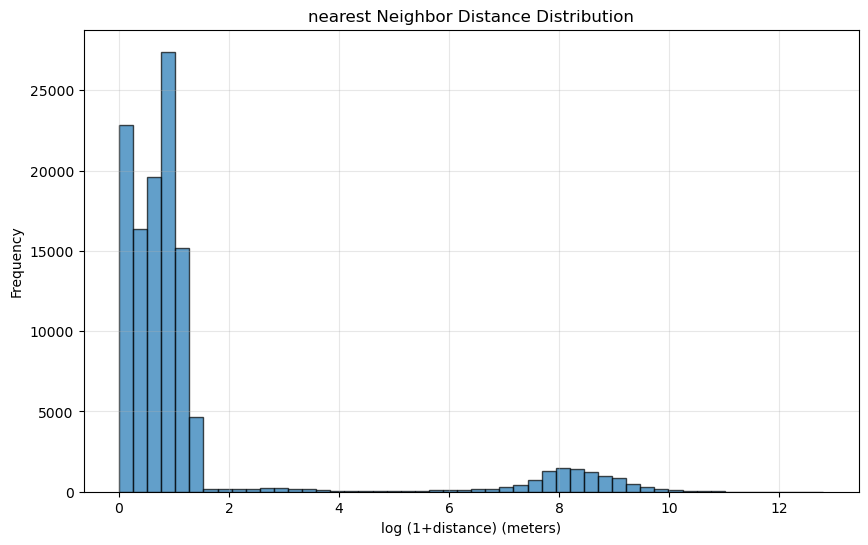

In [26]:
import matplotlib.pyplot as plt

result = [np.log1p(dist) for dist in result if not pd.isnull(dist)]
# 方法1：使用matplotlib直接绘制
plt.figure(figsize=(10, 6))
plt.hist(result, bins=50, alpha=0.7, edgecolor='black')
plt.title('nearest Neighbor Distance Distribution')
plt.xlabel('log (1+distance) (meters)')
plt.ylabel('Frequency')
plt.grid(True, alpha=0.3)
plt.show()

Calculating nearest neighbor distances for year 2013 and 2014...


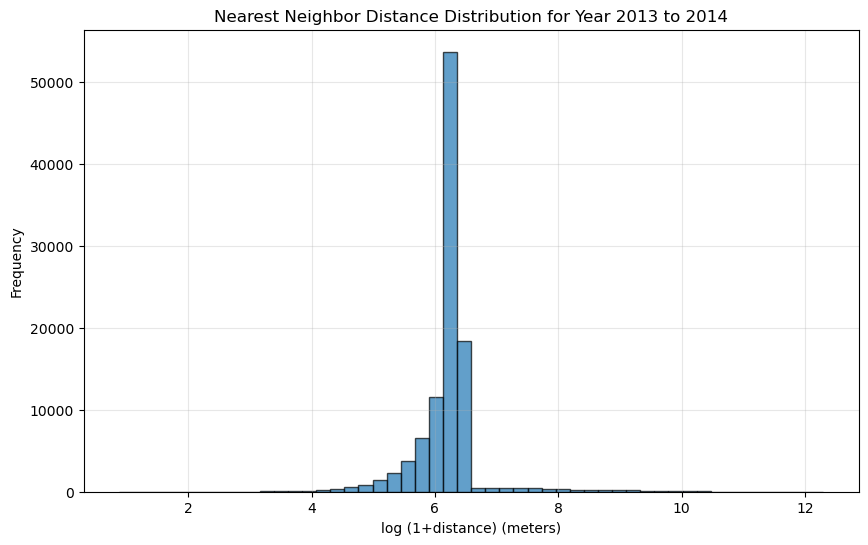

Completed for year 2013.
Calculating nearest neighbor distances for year 2014 and 2015...


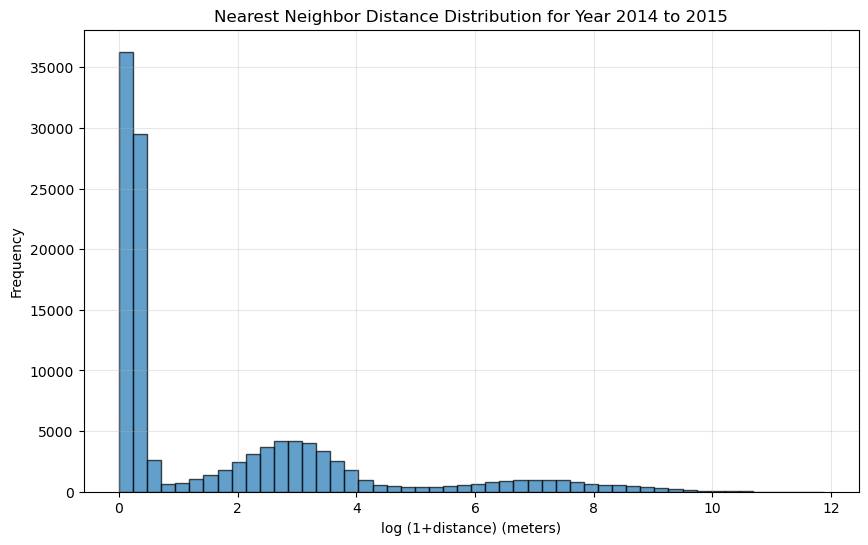

Completed for year 2014.
Calculating nearest neighbor distances for year 2015 and 2016...


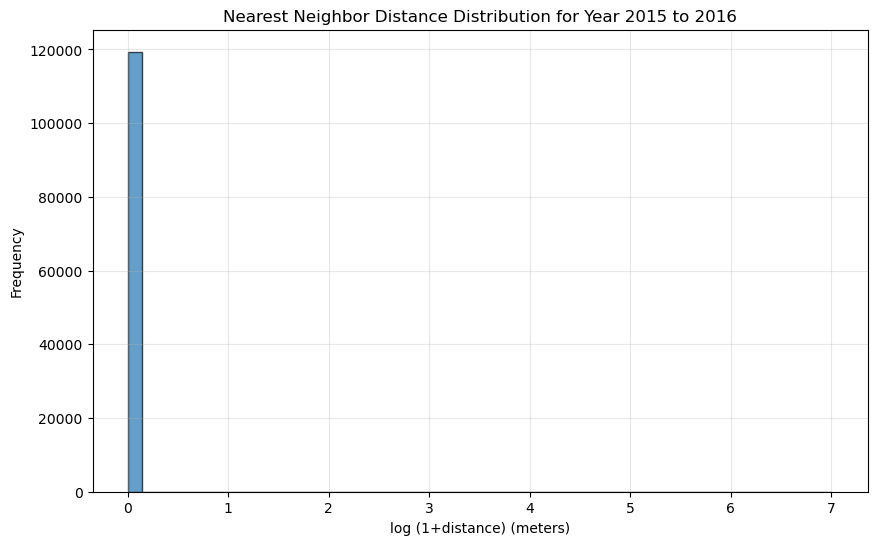

Completed for year 2015.
Calculating nearest neighbor distances for year 2016 and 2017...


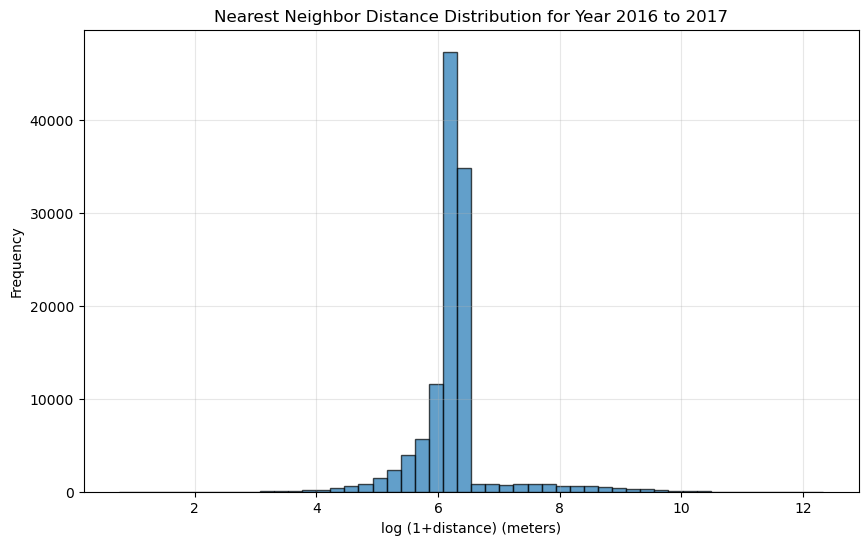

Completed for year 2016.
Calculating nearest neighbor distances for year 2017 and 2018...


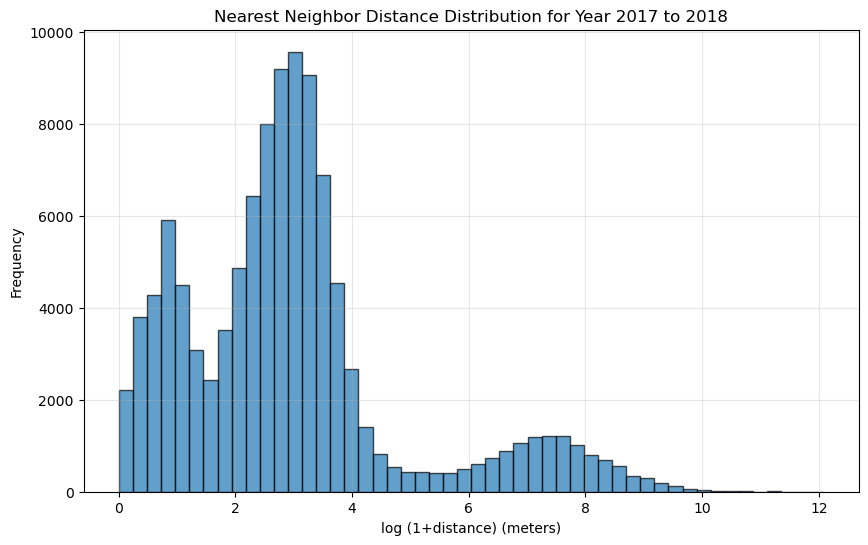

Completed for year 2017.
Calculating nearest neighbor distances for year 2018 and 2019...


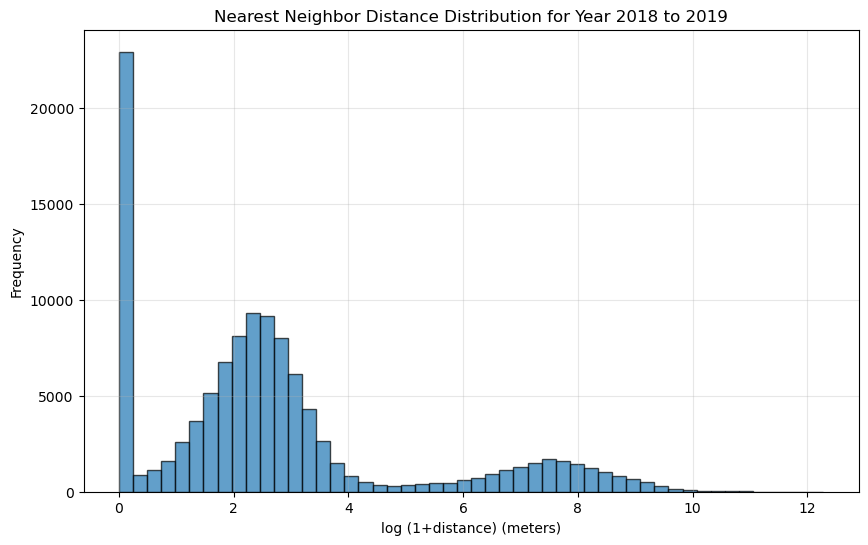

Completed for year 2018.
Calculating nearest neighbor distances for year 2019 and 2020...


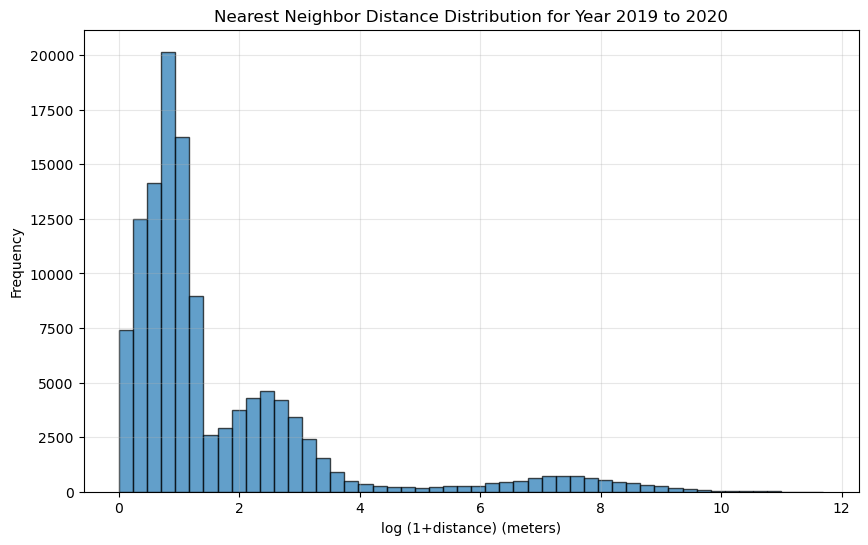

Completed for year 2019.
Calculating nearest neighbor distances for year 2020 and 2021...


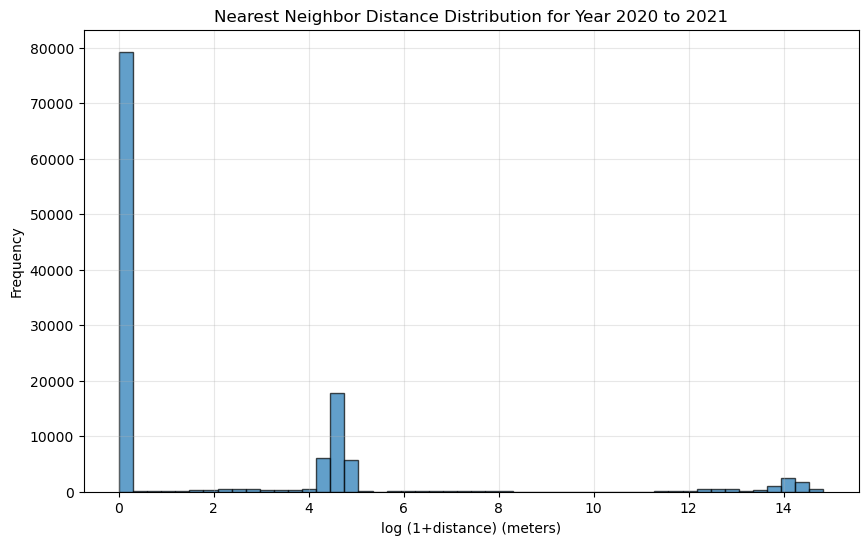

Completed for year 2020.
Calculating nearest neighbor distances for year 2021 and 2022...


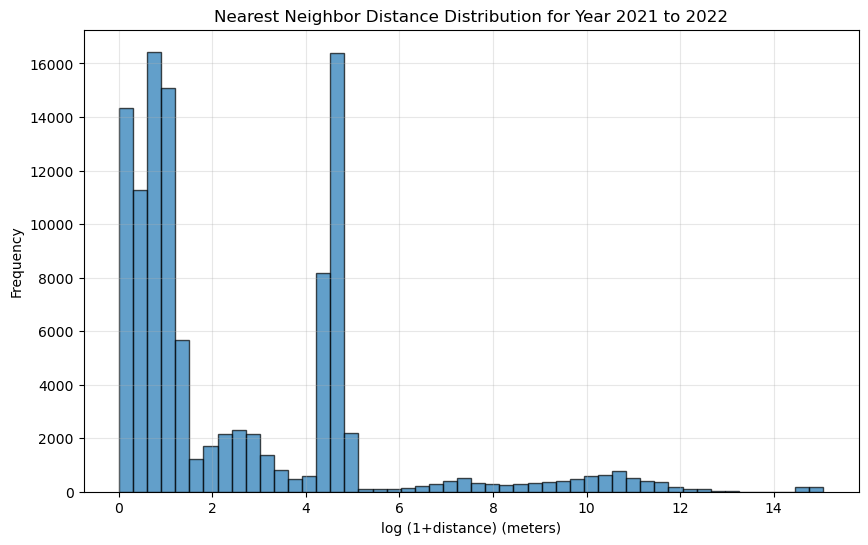

Completed for year 2021.
Calculating nearest neighbor distances for year 2022 and 2023...


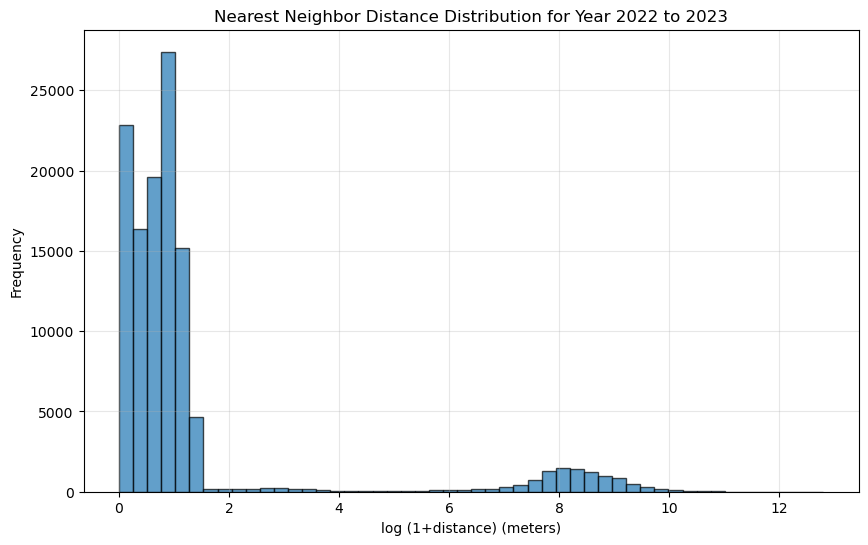

Completed for year 2022.
Calculating nearest neighbor distances for year 2023 and 2024...


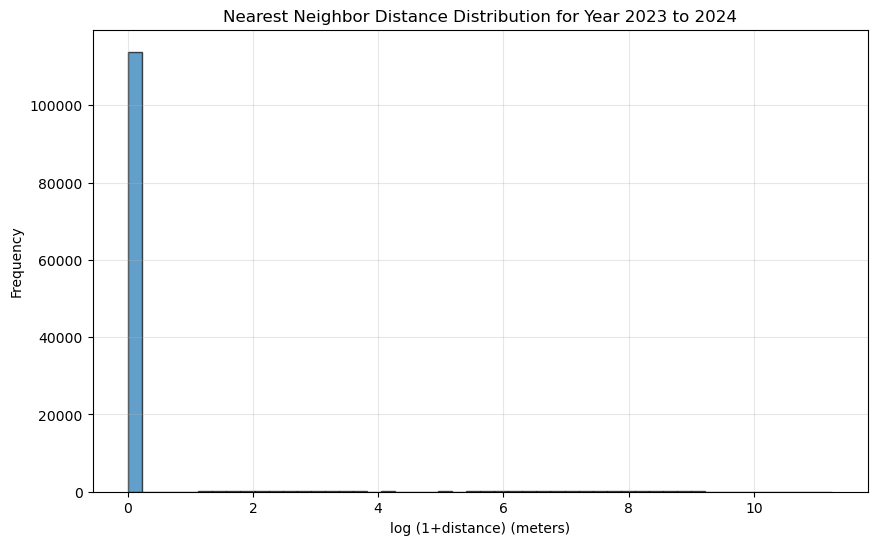

Completed for year 2023.
Calculating nearest neighbor distances for year 2024 and 2025...


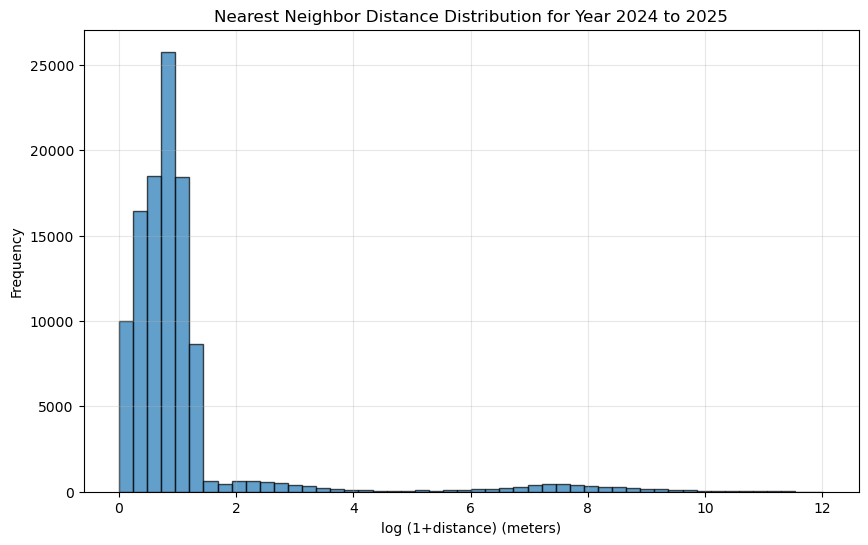

Completed for year 2024.
Calculating nearest neighbor distances for year 2015 and 2016...


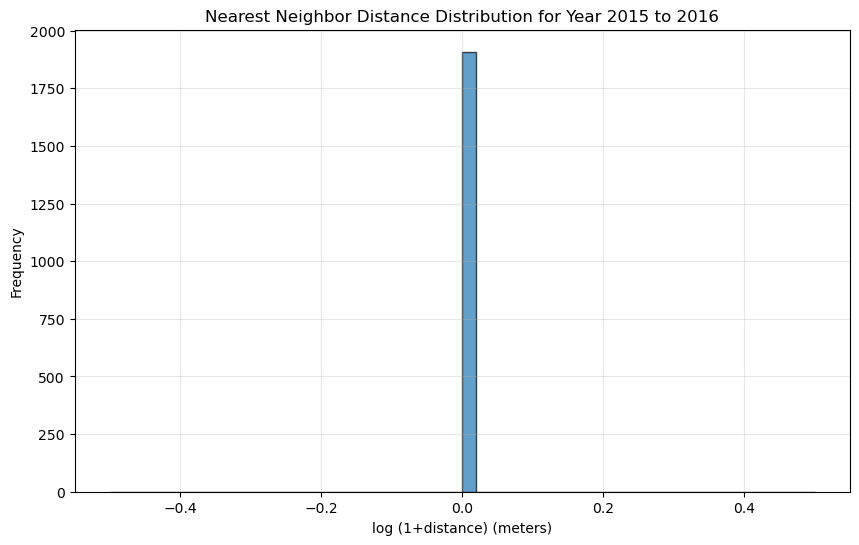

Completed for year 2015.
Calculating nearest neighbor distances for year 2016 and 2017...


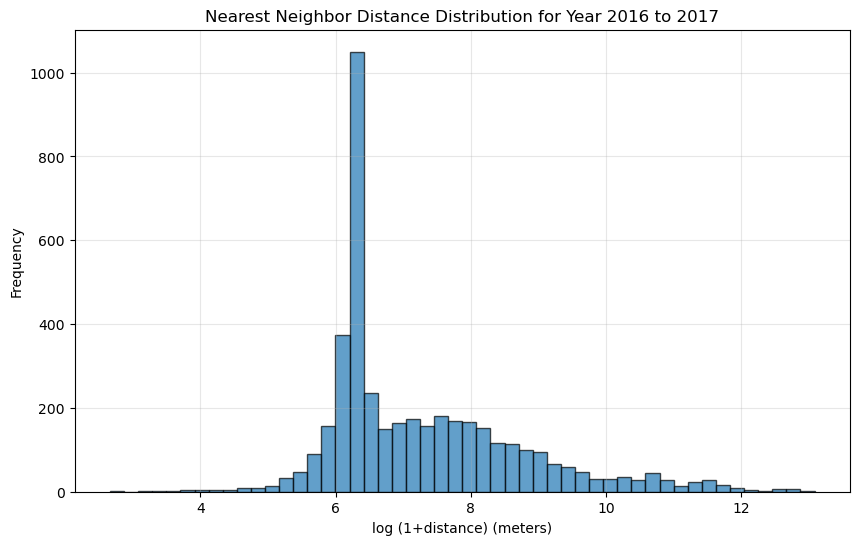

Completed for year 2016.
Calculating nearest neighbor distances for year 2017 and 2018...


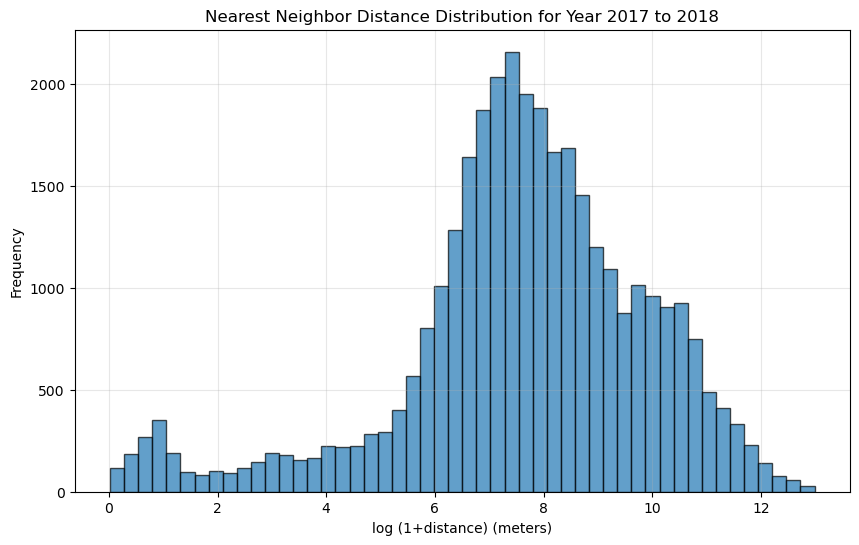

Completed for year 2017.
Calculating nearest neighbor distances for year 2018 and 2019...


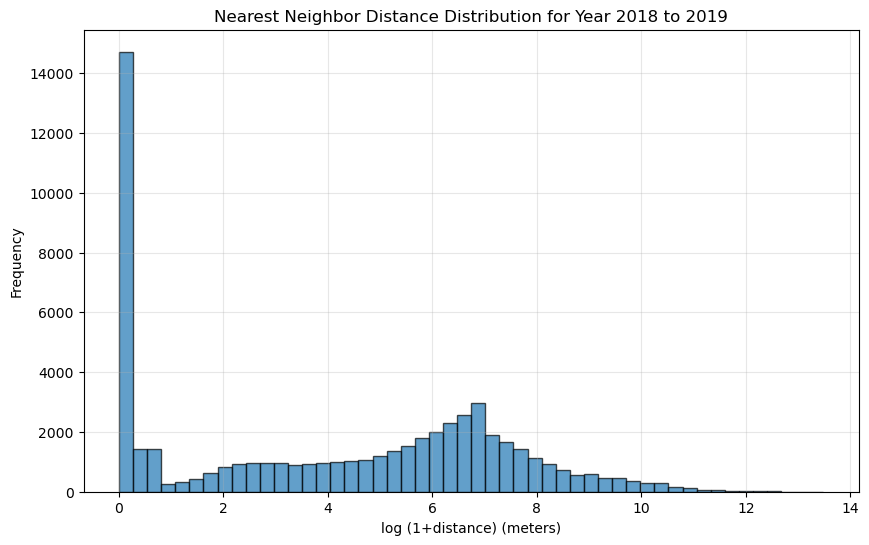

Completed for year 2018.
Calculating nearest neighbor distances for year 2019 and 2020...


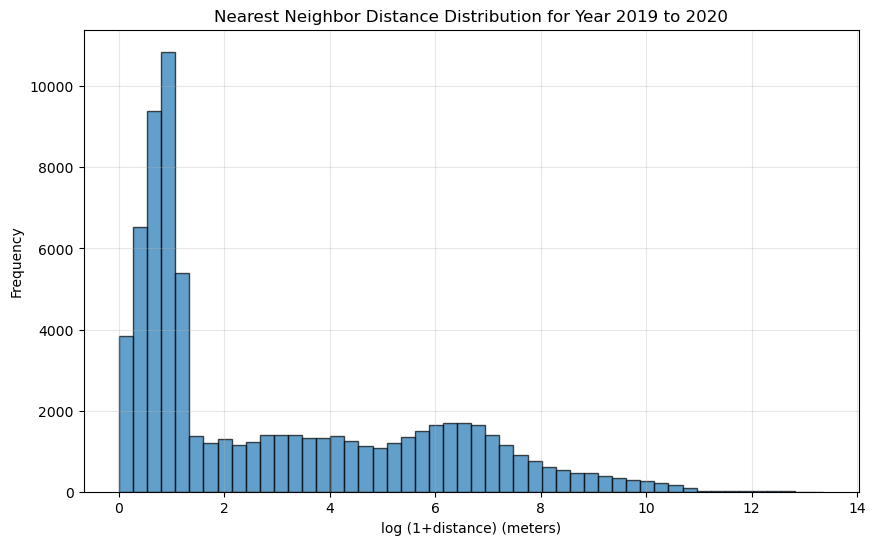

Completed for year 2019.
Calculating nearest neighbor distances for year 2020 and 2021...


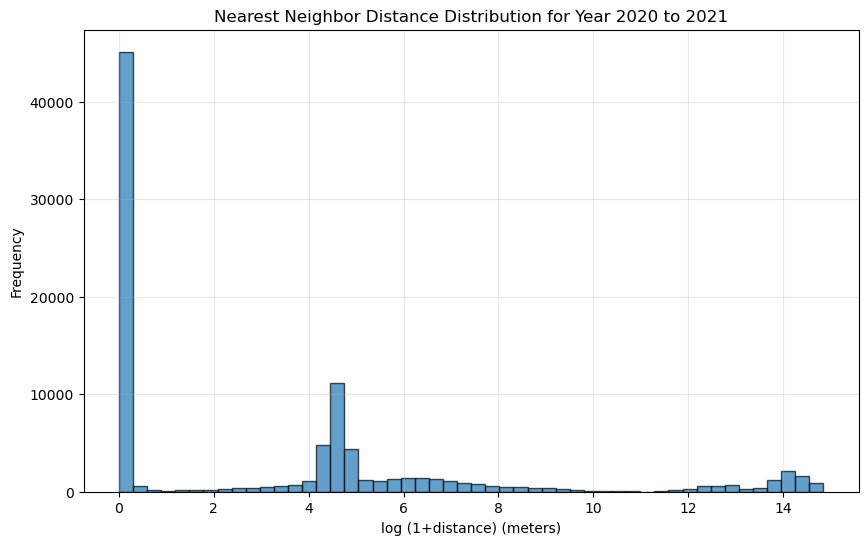

Completed for year 2020.
Calculating nearest neighbor distances for year 2021 and 2022...


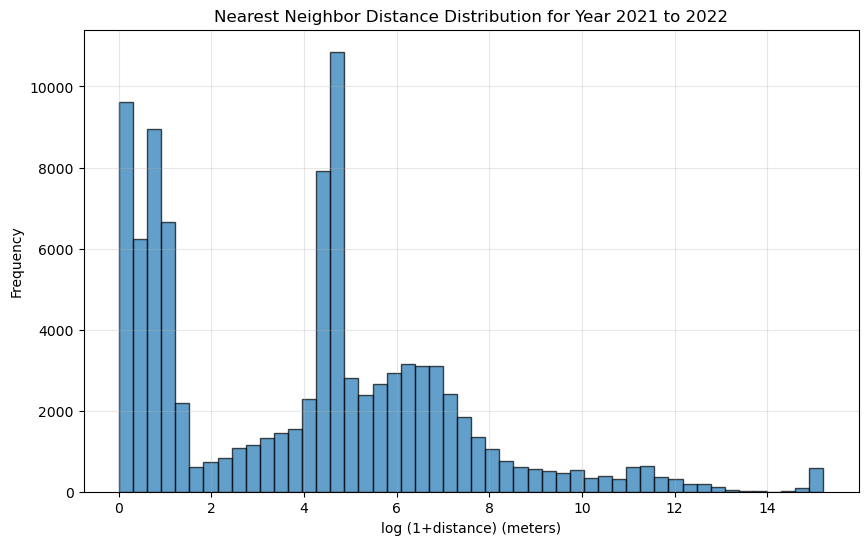

Completed for year 2021.
Calculating nearest neighbor distances for year 2022 and 2023...


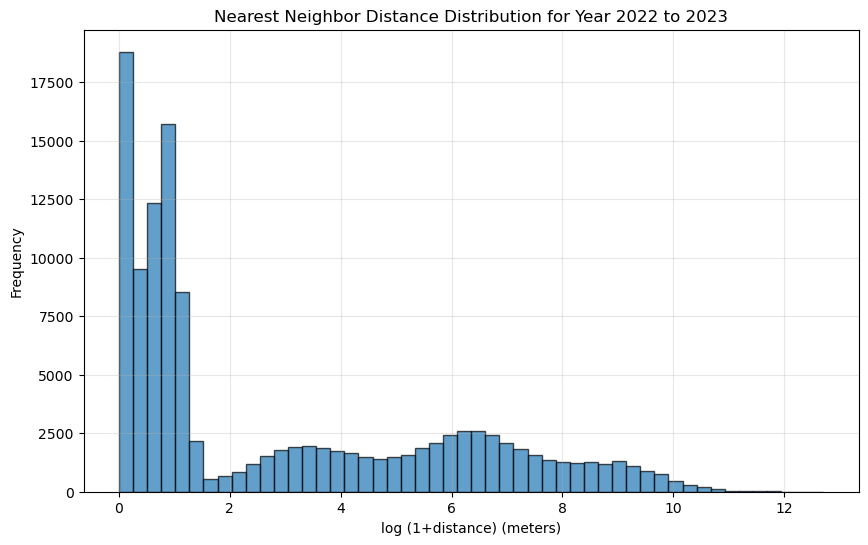

Completed for year 2022.
Calculating nearest neighbor distances for year 2023 and 2024...


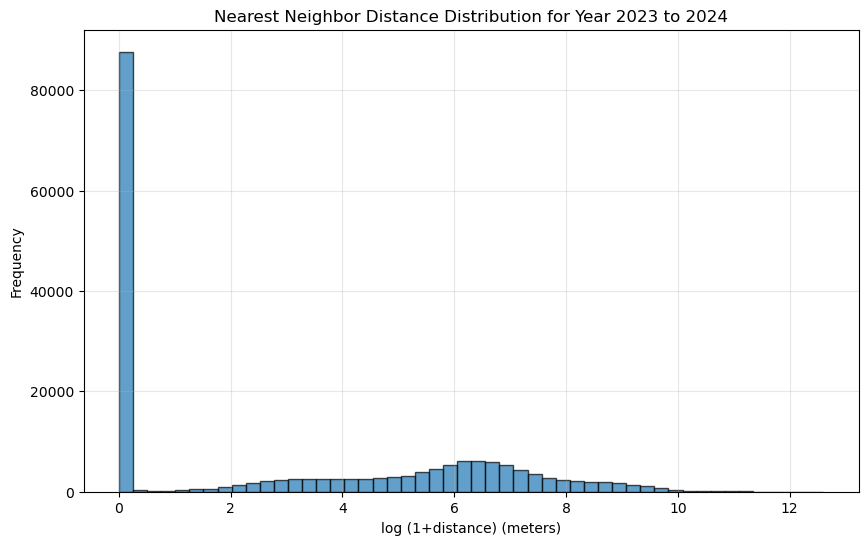

Completed for year 2023.
Calculating nearest neighbor distances for year 2024 and 2025...


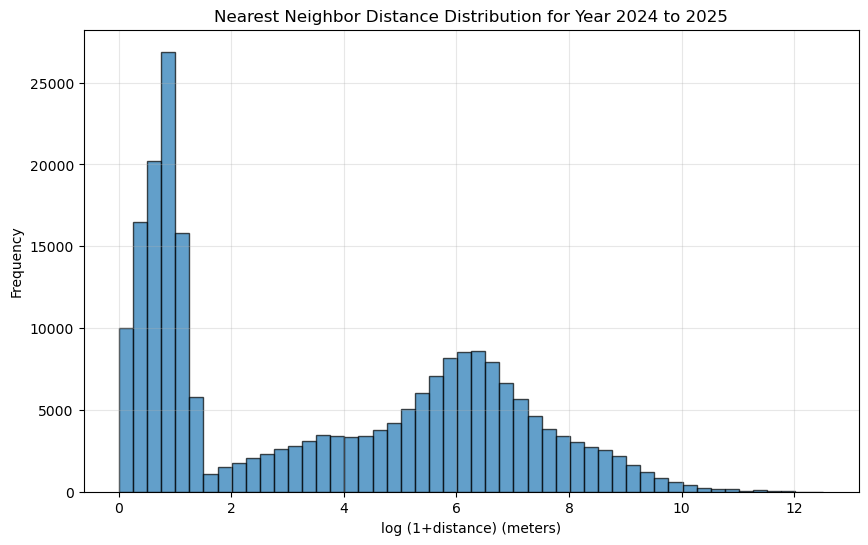

Completed for year 2024.


In [28]:
nearest_GS_neighbor_distance_set = {}
for key in GS_data_set.keys():
    if key+1 in GS_data_set.keys():
        print(f"Calculating nearest neighbor distances for year {key} and {key+1}...")
        distances = calculate_nearest_neighbor_distances(GS_data_set[key],GS_data_set[key+1],'wgs84_x','wgs84_y',['pname'])
        nearest_GS_neighbor_distance_set[key+1] = distances
        distances = [np.log1p(dist) for dist in distances if not pd.isnull(dist)]
        plt.figure(figsize=(10, 6))
        plt.hist(distances, bins=50, alpha=0.7, edgecolor='black')
        plt.title(f'Nearest Neighbor Distance Distribution for Year {key} to {key+1}')
        plt.xlabel('log (1+distance) (meters)')
        plt.ylabel('Frequency')
        plt.grid(True, alpha=0.3)
        plt.show()
        print(f"Completed for year {key}.")
nearest_CS_neighbor_distance_set = {}
for key in CS_data_set.keys():
    if key+1 in CS_data_set.keys():
        print(f"Calculating nearest neighbor distances for year {key} and {key+1}...")
        distances = calculate_nearest_neighbor_distances(CS_data_set[key],CS_data_set[key+1],'wgs84_x','wgs84_y',['pname'])
        nearest_CS_neighbor_distance_set[key+1] = distances
        distances = [np.log1p(dist) for dist in distances if not pd.isnull(dist)]
        plt.figure(figsize=(10, 6))
        plt.hist(distances, bins=50, alpha=0.7, edgecolor='black')
        plt.title(f'Nearest Neighbor Distance Distribution for Year {key} to {key+1}')
        plt.xlabel('log (1+distance) (meters)')
        plt.ylabel('Frequency')
        plt.grid(True, alpha=0.3)
        plt.show()
        print(f"Completed for year {key}.")


Year 2014. Ratio of distances less than 50 m: 0.26%


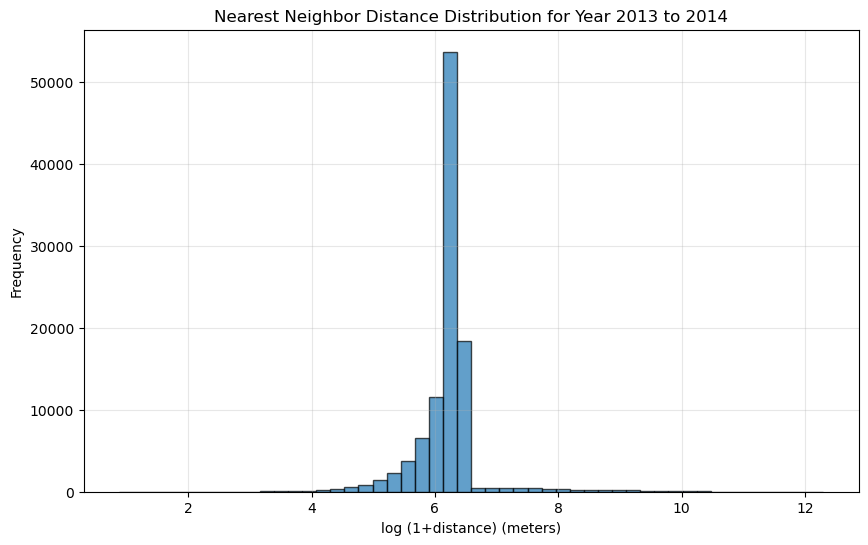

Year 2015. Ratio of distances less than 50 m: 86.80%


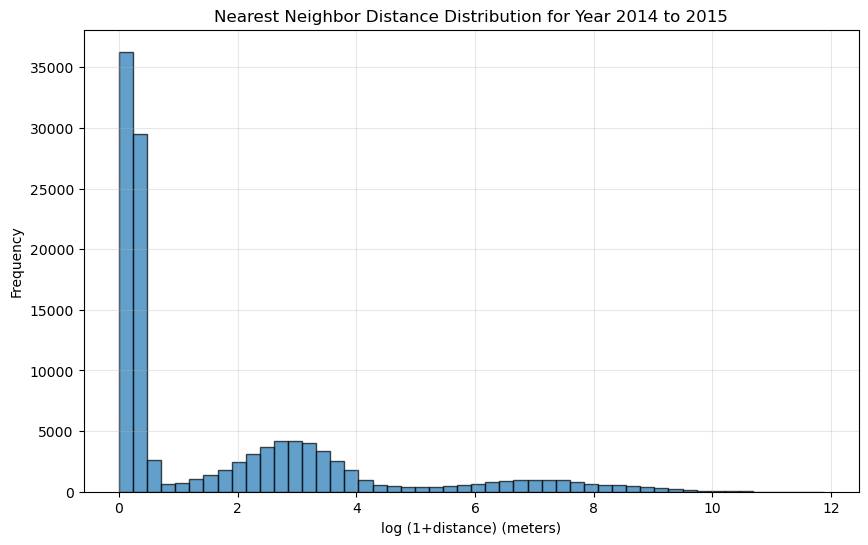

Year 2016. Ratio of distances less than 50 m: 99.99%


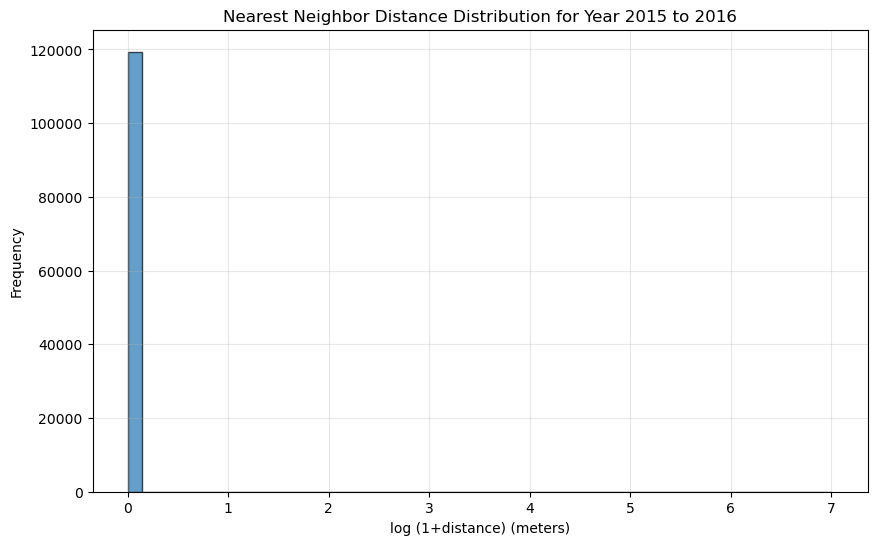

Year 2017. Ratio of distances less than 50 m: 0.27%


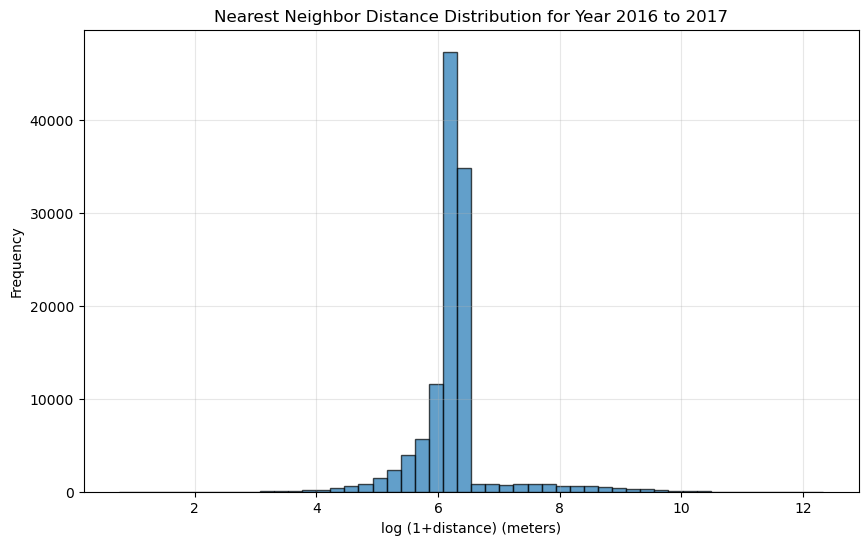

Year 2018. Ratio of distances less than 50 m: 83.28%


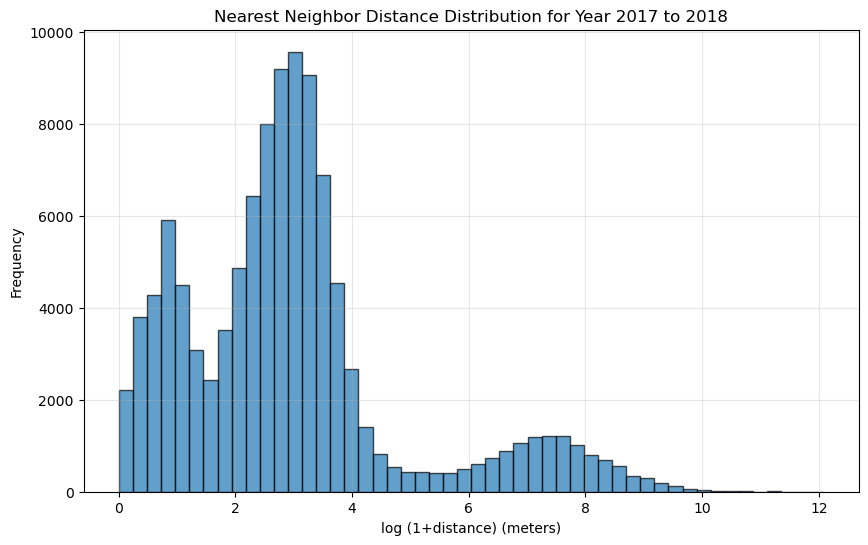

Year 2019. Ratio of distances less than 50 m: 82.81%


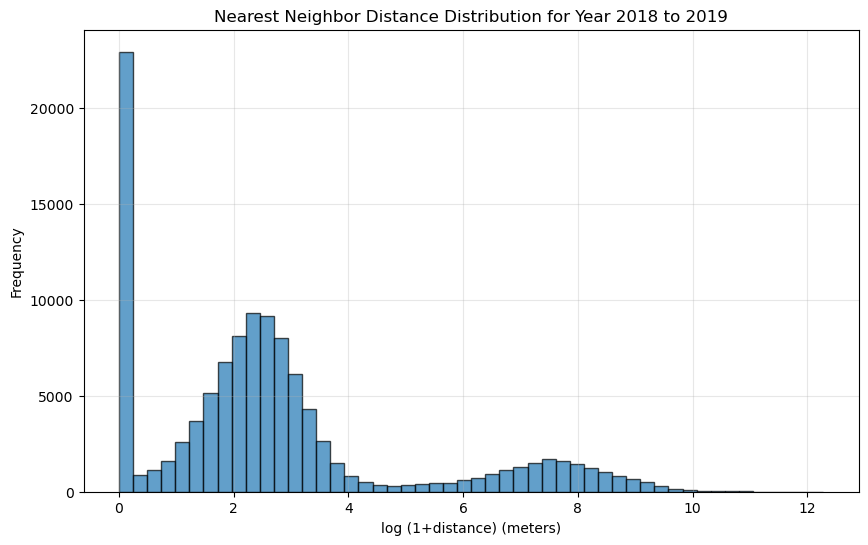

Year 2020. Ratio of distances less than 50 m: 92.14%


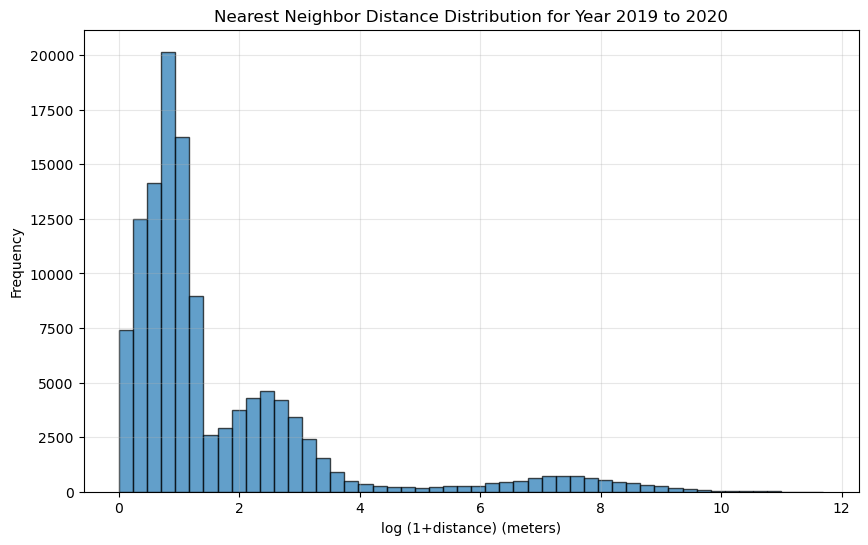

Year 2021. Ratio of distances less than 50 m: 68.13%


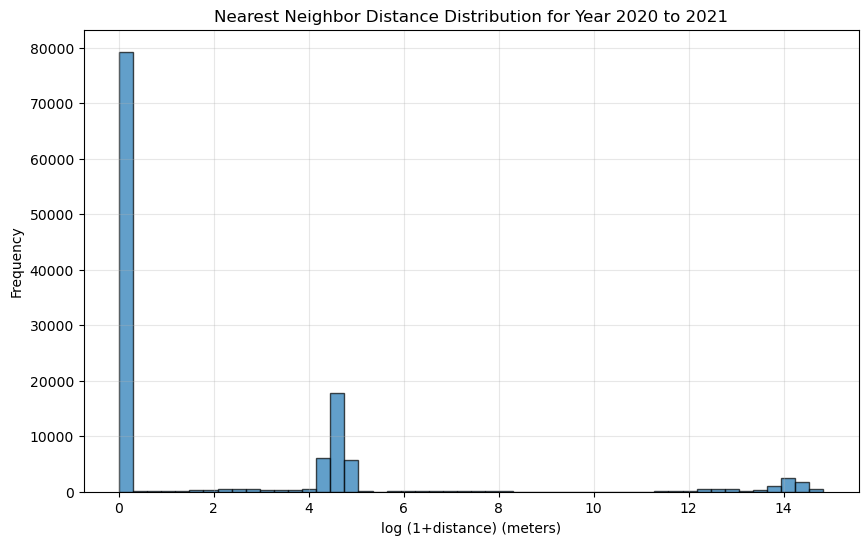

Year 2022. Ratio of distances less than 50 m: 67.57%


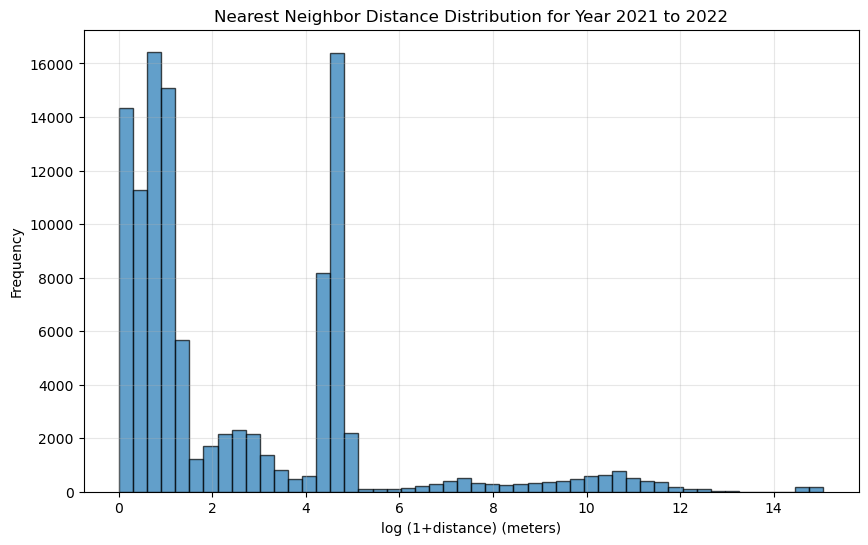

Year 2023. Ratio of distances less than 50 m: 90.84%


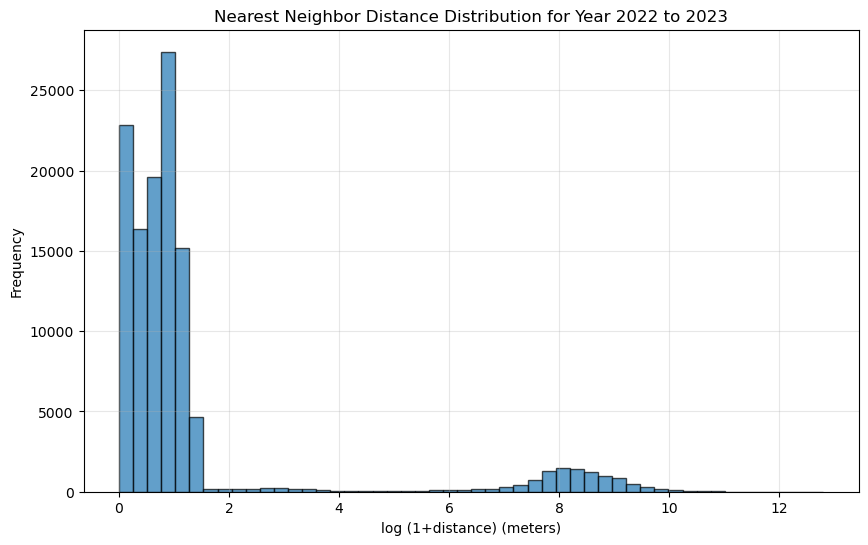

Year 2024. Ratio of distances less than 50 m: 97.37%


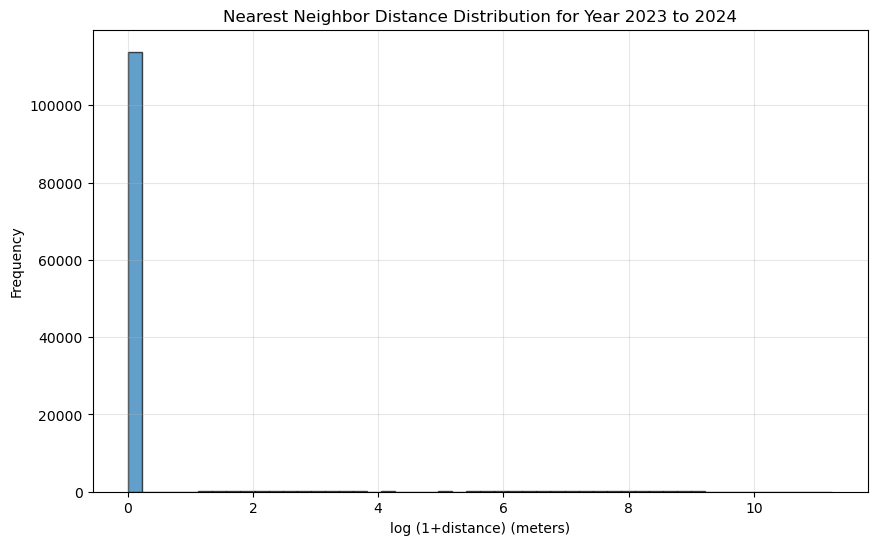

Year 2025. Ratio of distances less than 50 m: 95.16%


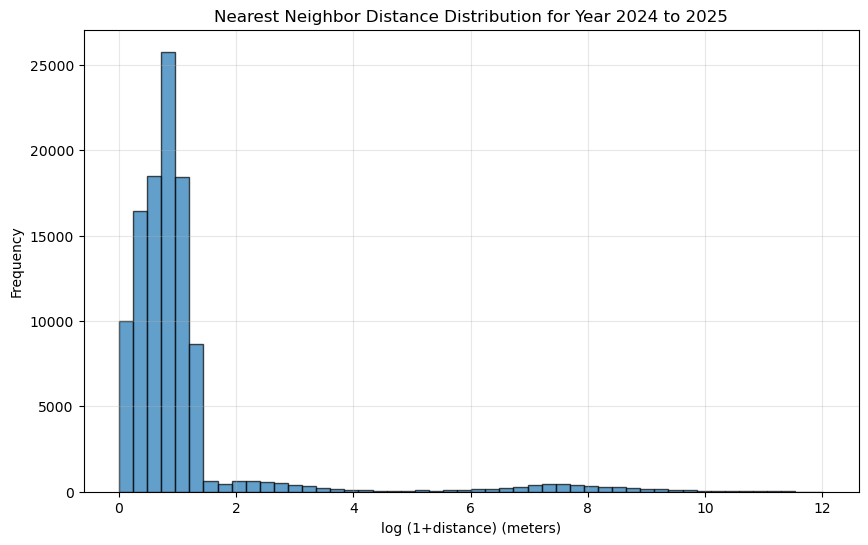

Year 2016. Ratio of distances less than 50 m: 100.00%


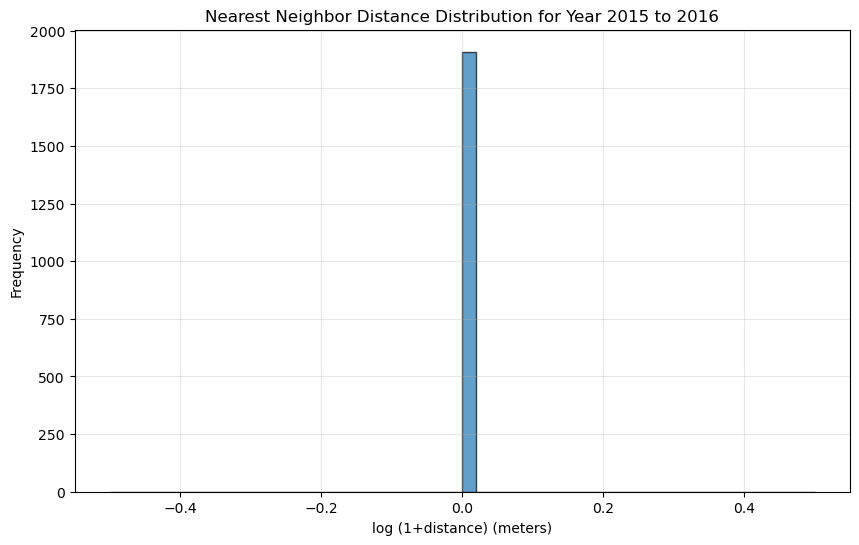

Year 2017. Ratio of distances less than 50 m: 0.21%


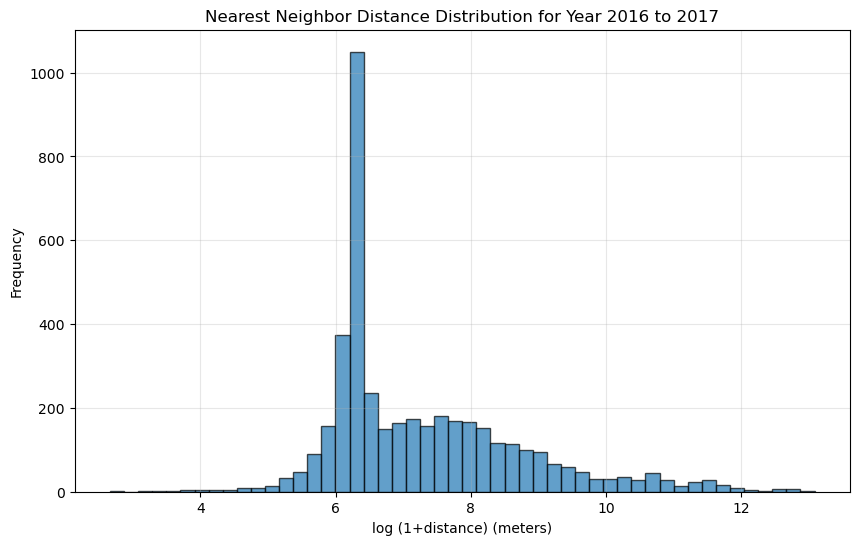

Year 2018. Ratio of distances less than 50 m: 7.32%


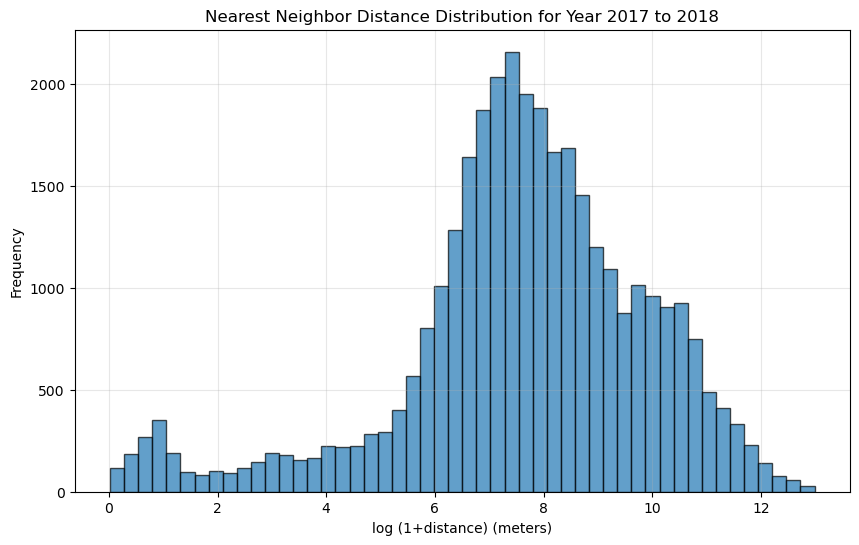

Year 2019. Ratio of distances less than 50 m: 46.20%


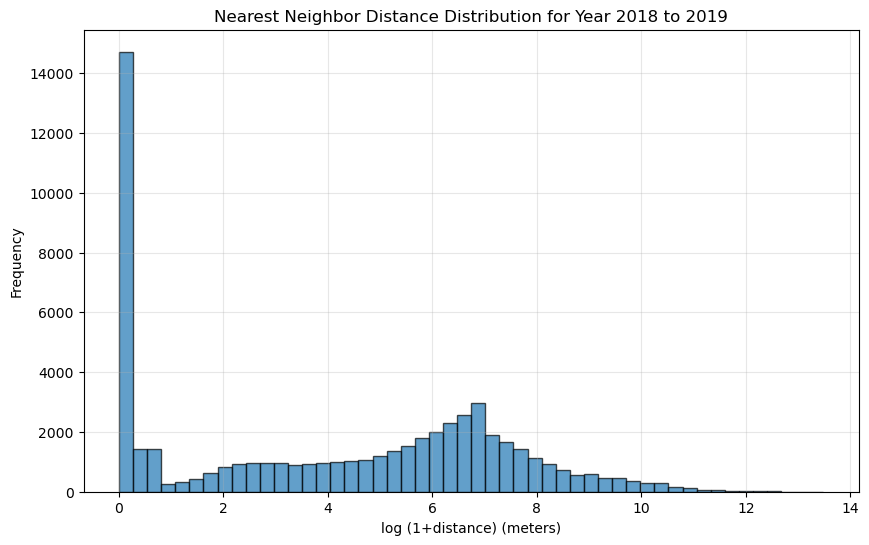

Year 2020. Ratio of distances less than 50 m: 66.80%


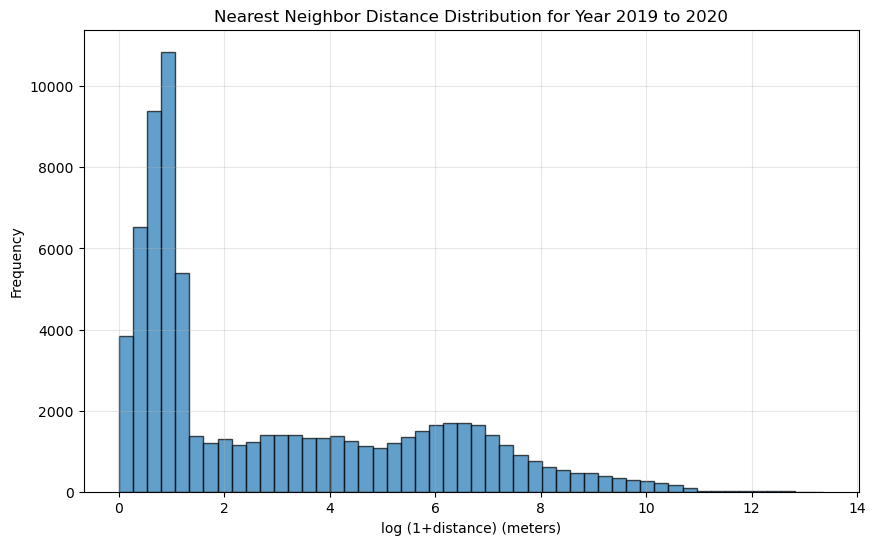

Year 2021. Ratio of distances less than 50 m: 53.06%


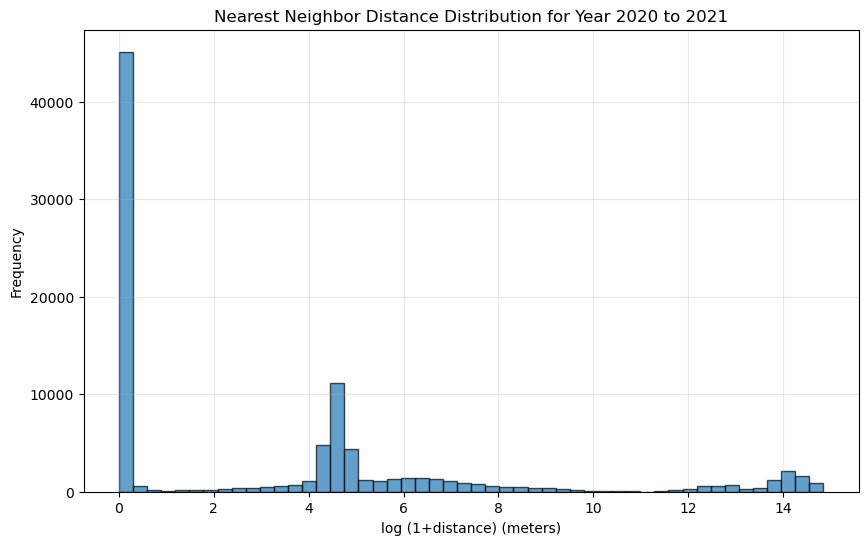

Year 2022. Ratio of distances less than 50 m: 43.15%


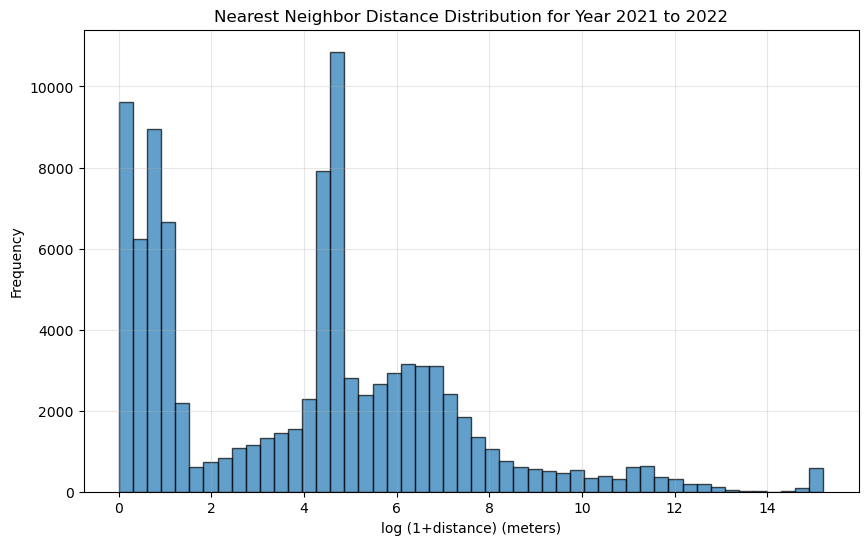

Year 2023. Ratio of distances less than 50 m: 66.97%


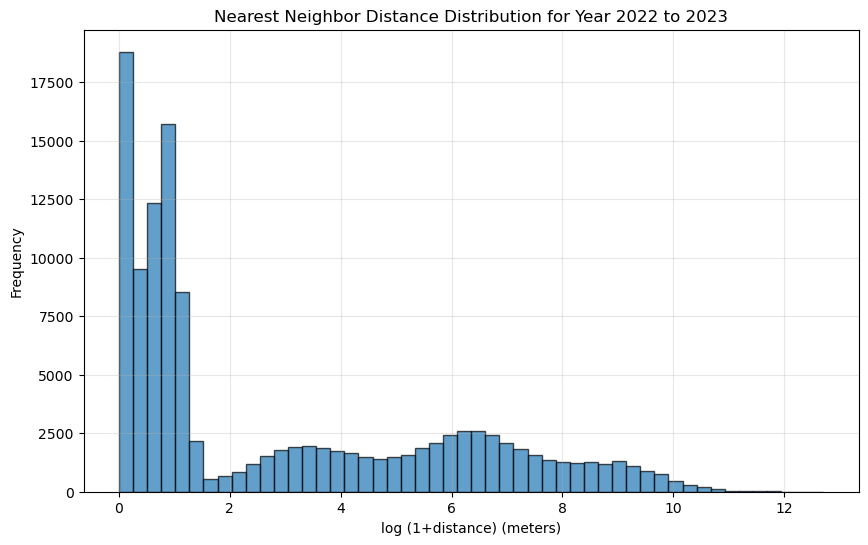

Year 2024. Ratio of distances less than 50 m: 58.11%


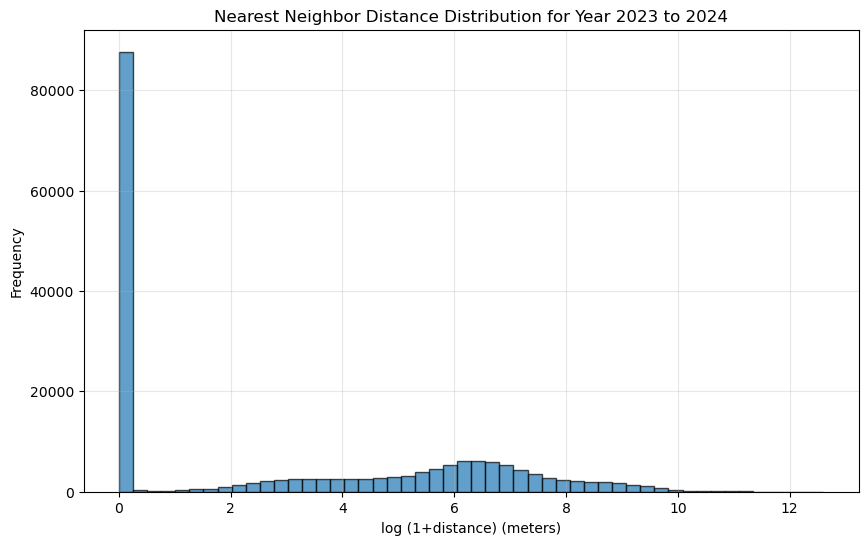

Year 2025. Ratio of distances less than 50 m: 52.48%


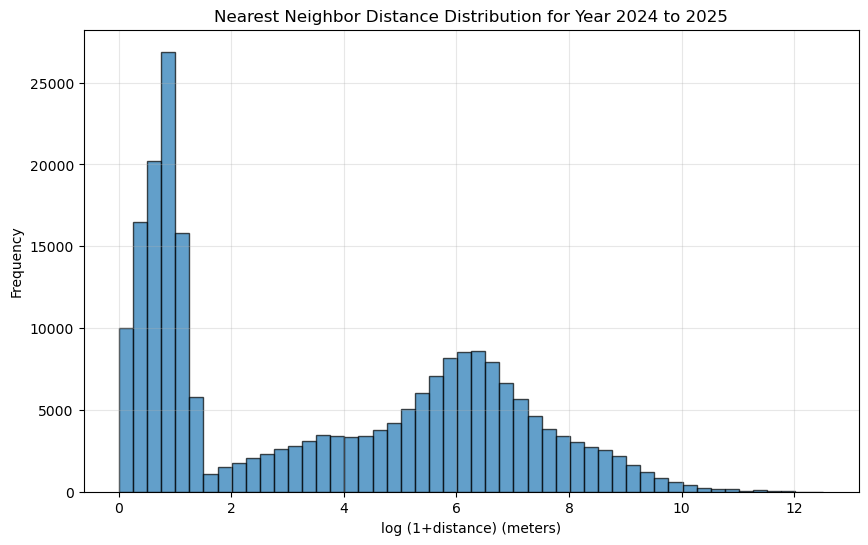

In [37]:
for key in nearest_GS_neighbor_distance_set.keys():
    distances = nearest_GS_neighbor_distance_set[key]
    print(f"Year {key}. Ratio of distances less than 50 m: {(np.array(distances)<50).sum()/len(distances)*100:.2f}%")
    tmp_distances = [np.log1p(dist) for dist in distances if not pd.isnull(dist)]
    plt.figure(figsize=(10, 6))
    plt.hist(tmp_distances, bins=50, alpha=0.7, edgecolor='black')
    plt.title(f'Nearest Neighbor Distance Distribution for Year {key-1} to {key}')
    plt.xlabel('log (1+distance) (meters)')
    plt.ylabel('Frequency')
    plt.grid(True, alpha=0.3)
    plt.show()
    
for key in nearest_CS_neighbor_distance_set.keys():
    distances = nearest_CS_neighbor_distance_set[key]
    print(f"Year {key}. Ratio of distances less than 50 m: {(np.array(distances)<50).sum()/len(distances)*100:.2f}%")
    tmp_distances = [np.log1p(dist) for dist in distances if not pd.isnull(dist)]
    plt.figure(figsize=(10, 6))
    plt.hist(tmp_distances, bins=50, alpha=0.7, edgecolor='black')
    plt.title(f'Nearest Neighbor Distance Distribution for Year {key-1} to {key}')
    plt.xlabel('log (1+distance) (meters)')
    plt.ylabel('Frequency')
    plt.grid(True, alpha=0.3)
    plt.show()


In [36]:
for key in nearest_GS_neighbor_distance_set.keys():
    print(f"Statistics for year {key}:")
    distances = nearest_GS_neighbor_distance_set[key]
    print(pd.Series(distances).describe())
    print()

Statistics for year 2014:
count    104327.000000
mean        665.479025
std        1853.830357
min           1.404201
25%         447.240989
50%         523.378312
75%         569.192773
max      219466.030622
dtype: float64

Statistics for year 2015:
count    118011.000000
mean        309.467063
std        2177.644552
min           0.000000
25%           0.222390
50%           0.423977
75%          17.537523
max      142908.905491
dtype: float64

Statistics for year 2016:
count    119393.000000
mean          0.036887
std           5.550617
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max        1109.106468
dtype: float64

Statistics for year 2017:
count    118441.000000
mean        798.058390
std        2808.409773
min           1.122917
25%         450.273339
50%         526.771197
75%         575.464408
max      227882.270617
dtype: float64

Statistics for year 2018:
count    107083.000000
mean        345.766374
std        2159.700537
m

In [52]:
print("=========GS=========")
for key in range(2014,2026):
    distances = nearest_GS_neighbor_distance_set[key]
    print(f"Year {key};   distances<50m: {(np.array(distances)<50).sum()/len(distances):.5f};   last_year/this_year: {len(GS_data_set[key-1])/len(GS_data_set[key]):.5f}\
    {((np.array(distances)<50).sum()/len(distances))/(len(GS_data_set[key-1])/len(GS_data_set[key])):.5f}")

=========GS=========
Year 2014;   distances<50m: 0.00256;   last_year/this_year: 0.97377    0.00263
Year 2015;   distances<50m: 0.86802;   last_year/this_year: 0.88404    0.98187
Year 2016;   distances<50m: 0.99994;   last_year/this_year: 0.98842    1.01165
Year 2017;   distances<50m: 0.00273;   last_year/this_year: 1.00804    0.00271
Year 2018;   distances<50m: 0.83284;   last_year/this_year: 1.10607    0.75297
Year 2019;   distances<50m: 0.82806;   last_year/this_year: 0.94481    0.87643
Year 2020;   distances<50m: 0.92139;   last_year/this_year: 0.94532    0.97469
Year 2021;   distances<50m: 0.68132;   last_year/this_year: 0.98673    0.69048
Year 2022;   distances<50m: 0.67568;   last_year/this_year: 1.09477    0.61719
Year 2023;   distances<50m: 0.90842;   last_year/this_year: 0.93644    0.97008
Year 2024;   distances<50m: 0.97366;   last_year/this_year: 0.99987    0.97379
Year 2025;   distances<50m: 0.95160;   last_year/this_year: 1.10300    0.86274


In [51]:
print("=========CS=========")
for key in range(2016,2026):
    distances = nearest_CS_neighbor_distance_set[key]
    print(f"Year {key};   distances<50m: {(np.array(distances)<50).sum()/len(distances):.5f};   last_year/this_year: {len(CS_data_set[key-1])/len(CS_data_set[key]):.5f}\
    {((np.array(distances)<50).sum()/len(distances))/(len(CS_data_set[key-1])/len(CS_data_set[key])):.5f}")

=========CS=========
Year 2016;   distances<50m: 1.00000;   last_year/this_year: 0.97224    1.02856
Year 2017;   distances<50m: 0.00212;   last_year/this_year: 0.44897    0.00471
Year 2018;   distances<50m: 0.07317;   last_year/this_year: 0.12673    0.57738
Year 2019;   distances<50m: 0.46201;   last_year/this_year: 0.59215    0.78022
Year 2020;   distances<50m: 0.66802;   last_year/this_year: 0.77764    0.85904
Year 2021;   distances<50m: 0.53063;   last_year/this_year: 0.78037    0.67997
Year 2022;   distances<50m: 0.43155;   last_year/this_year: 0.95377    0.45247
Year 2023;   distances<50m: 0.66971;   last_year/this_year: 0.81723    0.81948
Year 2024;   distances<50m: 0.58108;   last_year/this_year: 0.64834    0.89626
Year 2025;   distances<50m: 0.52484;   last_year/this_year: 0.82023    0.63987


In [54]:
print("=========GS=========")
for key in range(2014,2026):
    distances = nearest_GS_neighbor_distance_set[key]
    print(f"Year {key};   distances<100m: {(np.array(distances)<100).sum()/len(distances):.5f};   last_year/this_year: {len(GS_data_set[key-1])/len(GS_data_set[key]):.5f}\
    {((np.array(distances)<100).sum()/len(distances))/(len(GS_data_set[key-1])/len(GS_data_set[key])):.5f}")

=========GS=========
Year 2014;   distances<100m: 0.01048;   last_year/this_year: 0.97377    0.01076
Year 2015;   distances<100m: 0.88891;   last_year/this_year: 0.88404    1.00550
Year 2016;   distances<100m: 0.99995;   last_year/this_year: 0.98842    1.01166
Year 2017;   distances<100m: 0.01064;   last_year/this_year: 1.00804    0.01055
Year 2018;   distances<100m: 0.87143;   last_year/this_year: 1.10607    0.78786
Year 2019;   distances<100m: 0.84235;   last_year/this_year: 0.94481    0.89155
Year 2020;   distances<100m: 0.92848;   last_year/this_year: 0.94532    0.98219
Year 2021;   distances<100m: 0.80278;   last_year/this_year: 0.98673    0.81358
Year 2022;   distances<100m: 0.79736;   last_year/this_year: 1.09477    0.72833
Year 2023;   distances<100m: 0.90973;   last_year/this_year: 0.93644    0.97147
Year 2024;   distances<100m: 0.97503;   last_year/this_year: 0.99987    0.97516
Year 2025;   distances<100m: 0.95371;   last_year/this_year: 1.10300    0.86465


In [55]:
print("=========CS=========")
for key in range(2016,2026):
    distances = nearest_CS_neighbor_distance_set[key]
    print(f"Year {key};   distances<100m: {(np.array(distances)<100).sum()/len(distances):.5f};   last_year/this_year: {len(CS_data_set[key-1])/len(CS_data_set[key]):.5f}\
    {((np.array(distances)<100).sum()/len(distances))/(len(CS_data_set[key-1])/len(CS_data_set[key])):.5f}")

=========CS=========
Year 2016;   distances<100m: 1.00000;   last_year/this_year: 0.97224    1.02856
Year 2017;   distances<100m: 0.00611;   last_year/this_year: 0.44897    0.01362
Year 2018;   distances<100m: 0.09019;   last_year/this_year: 0.12673    0.71167
Year 2019;   distances<100m: 0.50783;   last_year/this_year: 0.59215    0.85759
Year 2020;   distances<100m: 0.71392;   last_year/this_year: 0.77764    0.91806
Year 2021;   distances<100m: 0.64983;   last_year/this_year: 0.78037    0.83273
Year 2022;   distances<100m: 0.55575;   last_year/this_year: 0.95377    0.58269
Year 2023;   distances<100m: 0.70581;   last_year/this_year: 0.81723    0.86366
Year 2024;   distances<100m: 0.61944;   last_year/this_year: 0.64834    0.95541
Year 2025;   distances<100m: 0.56577;   last_year/this_year: 0.82023    0.68978


In [56]:
GS_data_set[2013]

,name,address,wgs84_x,wgs84_y,tel,pname,cityname,adname,大类,中类,小类,pname_EN,cityname_EN
0,九环汽车液化加气站,曹家堰路３８,121.429478,31.215804,,上海市,上海市,长宁区,汽车服务,加气站,加气站,Shanghai,Shanghai
1,强隆加油站,,121.345873,31.225219,,上海市,上海市,长宁区,汽车服务,加油站,中国石化,Shanghai,Shanghai
2,中国海油加油站（哈密苑西南）,,121.361647,31.202550,,上海市,上海市,长宁区,汽车服务,加油站,加油站,Shanghai,Shanghai
3,华江石油加油站（万航渡路）,万航渡路５０６,121.430557,31.226794,,上海市,上海市,长宁区,汽车服务,加油站,加油站,Shanghai,Shanghai
4,剑河加油站,泉口路９２号,121.364185,31.209988,,上海市,上海市,长宁区,汽车服务,加油站,中国石化,Shanghai,Shanghai
...,...,...,...,...,...,...,...,...,...,...,...,...,...
101586,加油站（兴安康复医院西）,,124.106174,50.421509,,黑龙江省,大兴安岭地区,加格达奇,汽车服务,加油站,中国石油,Heilongjiang Province,Daxinganling area
101587,加油站,,124.172164,50.417751,,黑龙江省,大兴安岭地区,加格达奇,汽车服务,加油站,中国石油,Heilongjiang Province,Daxinganling area
101588,兴安石油加油站,,124.171191,50.418762,,黑龙江省,大兴安岭地区,加格达奇,汽车服务,加油站,加油站,Heilongjiang Province,Daxinganling area
101589,加油站（华洋西一小区西北）,,124.116511,50.428458,,黑龙江省,大兴安岭地区,加格达奇,汽车服务,加油站,加油站,Heilongjiang Province,Daxinganling area


In [ ]:
filter_2014 = (GS_data_set[2014]['name']=='九环汽车液化加气站')
print(GS_data_set[2014][filter_2014][['name','wgs84_x','wgs84_y']])
filter_2013 = (GS_data_set[2013]['name']=='九环汽车液化加气站')
print(GS_data_set[2013][filter_2013][['name','wgs84_x','wgs84_y']])


           name     wgs84_x    wgs84_y
6854  九环汽车液化加气站  121.434101  31.213939
6858      剑河加油站  121.368808  31.208120
        name     wgs84_x    wgs84_y
0  九环汽车液化加气站  121.429478  31.215804
4      剑河加油站  121.364185  31.209988


In [86]:
def calculate_systematic_shift(name,year):
    print(f"Calculating systematic shift for {name} over years {year}")
    x_cordinates = []
    y_cordinates = []
    for y in year:
        data_tmp = GS_data_set[y]
        filter_tmp = data_tmp['name']==name
        print(f"Year {y}: {len(data_tmp[filter_tmp])} entries, from {data_tmp[filter_tmp]['pname'].values} {data_tmp[filter_tmp]['cityname'].values}")
        x_cordinates.extend(data_tmp[filter_tmp]['wgs84_x'].values)
        y_cordinates.extend(data_tmp[filter_tmp]['wgs84_y'].values)
    print("X shift:", (x_cordinates[1]-x_cordinates[0]) * 111321.0, "Y shift:", (y_cordinates[1]-y_cordinates[0]) * 111321.0)


In [87]:
calculate_systematic_shift('九环汽车液化加气站',[2013,2014])
calculate_systematic_shift('剑河加油站',[2013,2014])
calculate_systematic_shift('南桥气体供应站',[2013,2014])
calculate_systematic_shift('赛奔新浜加油站',[2013,2014])


Calculating systematic shift for 九环汽车液化加气站 over years [2013, 2014]
Year 2013: 1 entries, from ['上海市'] ['上海市']
Year 2014: 1 entries, from ['上海市'] ['上海市']
X shift: 514.6169725557672 Y shift: -207.6539970948652
Calculating systematic shift for 剑河加油站 over years [2013, 2014]
Year 2013: 1 entries, from ['上海市'] ['上海市']
Year 2014: 1 entries, from ['上海市'] ['上海市']
X shift: 514.636213644829 Y shift: -208.00245744635427
Calculating systematic shift for 南桥气体供应站 over years [2013, 2014]
Year 2013: 1 entries, from ['上海市'] ['上海市']
Year 2014: 1 entries, from ['上海市'] ['上海市']
X shift: 510.46019680307165 Y shift: -226.30646276869555
Calculating systematic shift for 赛奔新浜加油站 over years [2013, 2014]
Year 2013: 1 entries, from ['上海市'] ['上海市']
Year 2014: 1 entries, from ['上海市'] ['上海市']
X shift: 492.9965242660942 Y shift: -271.8533375199064


In [112]:
calculate_systematic_shift('九环汽车液化加气站',[2014,2015])
calculate_systematic_shift('南桥气体供应站',[2014,2015])


Calculating systematic shift for 九环汽车液化加气站 over years [2014, 2015]
Year 2014: 1 entries, from ['上海市'] ['上海市']
Year 2015: 1 entries, from ['上海市'] ['上海市']
X shift: -0.44528400045773253 Y shift: 0.11132100011443313
Calculating systematic shift for 南桥气体供应站 over years [2014, 2015]
Year 2014: 1 entries, from ['上海市'] ['上海市']
Year 2015: 1 entries, from ['上海市'] ['上海市']
X shift: 33.06233700036985 Y shift: -12.91323600022302


In [ ]:
calculate_systematic_shift('清平溶鑫加油站',[2013,2014])
calculate_systematic_shift('陇川凤盈加油站',[2013,2014])
calculate_systematic_shift('陇川凤盈加油站',[2013,2014])
print()
calculate_systematic_shift('伟宏磨憨加油站',[2013,2014])
calculate_systematic_shift('勐棒鑫城加油站',[2013,2014])
calculate_systematic_shift('曼庄金龙加油站',[2013,2014])
print()
calculate_systematic_shift('稗子沟加油站',[2013,2014])
calculate_systematic_shift('南雁石化加油站',[2013,2014])
calculate_systematic_shift('彩云农机加油站',[2013,2014])

Calculating systematic shift for 清平溶鑫加油站 over years [2013, 2014]
Year 2013: 1 entries, from ['云南省'] ['德宏傣族景颇族自治州']
Year 2014: 1 entries, from ['云南省'] ['德宏傣族景颇族自治州']
X shift: 41.77001519123135 Y shift: -326.4313311806381
Calculating systematic shift for 陇川凤盈加油站 over years [2013, 2014]
Year 2013: 1 entries, from ['云南省'] ['德宏傣族景颇族自治州']
Year 2014: 1 entries, from ['云南省'] ['德宏傣族景颇族自治州']
X shift: 56.18279528600844 Y shift: -346.2947254353234
Calculating systematic shift for 陇川凤盈加油站 over years [2013, 2014]
Year 2013: 1 entries, from ['云南省'] ['德宏傣族景颇族自治州']
Year 2014: 1 entries, from ['云南省'] ['德宏傣族景颇族自治州']
X shift: 56.18279528600844 Y shift: -346.2947254353234

Calculating systematic shift for 伟宏磨憨加油站 over years [2013, 2014]
Year 2013: 1 entries, from ['云南省'] ['西双版纳傣族自治州']
Year 2014: 1 entries, from ['云南省'] ['西双版纳傣族自治州']
X shift: 154.68867585440572 Y shift: -293.28692597949833
Calculating systematic shift for 勐棒鑫城加油站 over years [2013, 2014]
Year 2013: 1 entries, from ['云南省'] ['西双版纳傣族自治州']
Year 

In [95]:
GS_data_set[2013][GS_data_set[2013]['pname'] == '北京市']

,name,address,wgs84_x,wgs84_y,tel,pname,cityname,adname,大类,中类,小类,pname_EN,cityname_EN
7376,加油站（密云县城市管理监察大队西北）,,116.851678,40.396330,,北京市,北京市,密云区,汽车服务,加油站,壳牌,Beijing,Beijing
7377,加油站（新宝路）,穆家峪,116.879460,40.381613,,北京市,北京市,密云区,汽车服务,加油站,中国石油,Beijing,Beijing
7378,加油站（新东小区西北）,,116.852102,40.370830,,北京市,北京市,密云区,汽车服务,加油站,中国石化,Beijing,Beijing
7379,加油站（宾阳大厦东北）,,116.864386,40.375876,,北京市,北京市,密云区,汽车服务,加油站,中国石化,Beijing,Beijing
7380,金秋旺加油站,,116.817877,40.326758,,北京市,北京市,密云区,汽车服务,加油站,加油站,Beijing,Beijing
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8545,加油站（宣武门西大街）,,116.366940,39.897863,,北京市,北京市,西城区,汽车服务,加油站,中国石油,Beijing,Beijing
8546,加油站（右安门内大街）,,116.357797,39.881394,,北京市,北京市,西城区,汽车服务,加油站,中国石化,Beijing,Beijing
8547,加油站（太平桥大街）,太平桥大街１１３,116.356555,39.910951,,北京市,北京市,西城区,汽车服务,加油站,中国石化,Beijing,Beijing
8548,平安大街加油站,厂桥,116.380464,39.931496,,北京市,北京市,西城区,汽车服务,加油站,中国石化,Beijing,Beijing


In [103]:
print("They are all located in Beijing.")
print("-------Miyun District-------")
calculate_systematic_shift('金秋旺加油站',[2013,2014])
calculate_systematic_shift('卸甲山加油站',[2013,2014])
calculate_systematic_shift('密鑫源加油站',[2013,2014])
print("-------Fengtai District-------")
calculate_systematic_shift('岳首通加油站',[2013,2014])
calculate_systematic_shift('造甲村加油站',[2013,2014])
calculate_systematic_shift('浩瀚龙加油站',[2013,2014])
print("-------Tongzhou District-------")
calculate_systematic_shift('聚福锦余加油站',[2013,2014])
calculate_systematic_shift('长凌营加油站',[2013,2014])
calculate_systematic_shift('京榆路加油站',[2013,2014])

They are all located in Beijing.
-------Miyun District-------
Calculating systematic shift for 金秋旺加油站 over years [2013, 2014]
Year 2013: 1 entries, from ['北京市'] ['北京市']
Year 2014: 1 entries, from ['北京市'] ['北京市']
X shift: 674.9655219376614 Y shift: 132.33437879808554
Calculating systematic shift for 卸甲山加油站 over years [2013, 2014]
Year 2013: 1 entries, from ['北京市'] ['北京市']
Year 2014: 1 entries, from ['北京市'] ['北京市']
X shift: 700.7728810603164 Y shift: 143.2465705835609
Calculating systematic shift for 密鑫源加油站 over years [2013, 2014]
Year 2013: 1 entries, from ['北京市'] ['北京市']
Year 2014: 1 entries, from ['北京市'] ['北京市']
X shift: 683.5715299047158 Y shift: 141.9155809952799
-------Fengtai District-------
Calculating systematic shift for 岳首通加油站 over years [2013, 2014]
Year 2013: 1 entries, from ['北京市'] ['北京市']
Year 2014: 1 entries, from ['北京市'] ['北京市']
X shift: 683.0282302984615 Y shift: 158.0050250676759
Calculating systematic shift for 造甲村加油站 over years [2013, 2014]
Year 2013: 1 entries, from

In [108]:
for key in GS_data_set.keys():
    filter = GS_data_set[key]['cityname'] == '白沙黎族自治'
    GS_data_set[key].loc[filter,'cityname'] = '白沙黎族自治县'

In [109]:
city_stats = {}

for year in GS_data_set.keys():
    data_tmp = GS_data_set[year]
    city_counts = data_tmp['cityname'].value_counts()
    city_stats[year] = city_counts

city_df = pd.DataFrame(city_stats).fillna(0).astype(int)

first_year = min(GS_data_set.keys())
city_df_sorted = city_df.sort_values(by=first_year, ascending=False)

print(f"GS data entries statistics by city and year (sorted by {first_year} count):")
city_df_sorted

GS data entries statistics by city and year (sorted by 2013 count):


,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024,2025
cityname,,,,,,,,,,,,,
保定市,1589,1647,1808,1826,1801,1395,1530,1585,1601,1400,1533,1514,1444
石家庄市,1534,1485,1690,1723,1634,1309,1393,1473,1482,1295,1394,1397,1320
重庆市,1463,1441,1799,1814,1700,1714,1862,1971,1997,1785,1969,1989,1971
临沂市,1360,1335,1476,1495,1423,1199,1244,1302,1320,1277,1253,1261,1223
唐山市,1273,1267,1403,1418,1354,1207,1226,1315,1326,1155,1260,1273,1226
...,...,...,...,...,...,...,...,...,...,...,...,...,...
新星市,0,0,0,0,0,0,0,0,13,7,12,12,16
昆玉市,0,0,0,0,0,4,6,6,8,6,10,10,14
胡杨河市,0,0,0,0,0,0,9,12,7,3,7,9,9


In [113]:
base_dir = "C:/Users/31155/Dropbox/EV-GasDualNetwork/Data/intermediate/yiwei/intermidiate"
CS_data_dir = base_dir + "/CS_cleaned/"
GS_data_dir = base_dir + "/GS_cleaned/"

for key in GS_data_set.keys():
    print(f"Year {key}: {len(GS_data_set[key])} entries")
    GS_data_set[key].to_parquet(GS_data_dir + f"GS_data_{key}.parquet")
for key in CS_data_set.keys():
    print(f"Year {key}: {len(CS_data_set[key])} entries")
    CS_data_set[key].to_parquet(CS_data_dir + f"CS_data_{key}.parquet")

Year 2013: 101591 entries
Year 2014: 104327 entries
Year 2015: 118011 entries
Year 2016: 119393 entries
Year 2017: 118441 entries
Year 2018: 107083 entries
Year 2019: 113338 entries
Year 2020: 119894 entries
Year 2021: 121506 entries
Year 2022: 110988 entries
Year 2023: 118521 entries
Year 2024: 118537 entries
Year 2025: 107468 entries
Year 2015: 1856 entries
Year 2016: 1909 entries
Year 2017: 4252 entries
Year 2018: 33552 entries
Year 2019: 56661 entries
Year 2020: 72863 entries
Year 2021: 93370 entries
Year 2022: 97896 entries
Year 2023: 119790 entries
Year 2024: 184763 entries
Year 2025: 225258 entries
